In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from IPython.display import Image
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [7]:
np.random.seed(1)
x1_first = np.random.normal(1, 1, 200)
x2_first = np.random.normal(0, 1, 200)
first_half= np.stack((x1_first,x2_first), axis = 1)
y1 = np.exp(5*x1_first  - x2_first)/(1+ np.exp(5*x1_first  - x2_first))
y1 = np.random.binomial(1, p= 1/(1 + np.exp(-x1_first - x2_first)))
x1_second = np.random.normal(-1, 1, 200)
x2_second = np.random.normal(0, 1, 200)
second_half= np.stack((x1_second,x2_second), axis = 1)
y2 = np.exp(5*x1_second  - x2_second)/(1+ np.exp(5*x1_second  - x2_second))
y2 = np.random.binomial(1, p= 1/(1 + np.exp(-x1_second - x2_second)))

In [8]:
X = np.concatenate((first_half,second_half))
print(X.shape)
y = np.concatenate((y1,y2))
print(y.shape)

(400, 2)
(400,)


## Problem 1

In [9]:
def sigmoid(theta,x):
    z=np.dot(x, theta)
    p=1/(1+ np.exp(-z))
    return p

def entropy_loss(y_pred, y):
    len_label=len(y)
    cost= (-y*np.log(y_pred) - (1-y)*np.log(1-y_pred)).sum()/len_label
    return cost

def gradient_descent(y_pred,y,x, learning_rate, theta):
    len_label=len(y)
    y = y.reshape(-1,1)
    gradient= (-(np.dot(np.transpose(x),(y-y_pred)))/len_label)
    theta= theta - learning_rate*gradient
    return theta

In [10]:
def train(y_label,x, theta,learning_rate, iterations):
    cost=[]
    for i in range(iterations):
        y_pred=sigmoid(theta,x)
        theta=gradient_descent(y_pred,y_label,x, learning_rate, theta)
        loss=entropy_loss(y_pred, y_label)
        #print(loss)
        cost.append(loss)
    return theta,cost

In [11]:
theta = np.zeros((X.shape[1], 1))
theta
final_theta, cost = train(y,X,theta, 0.1, 1000)



## Final Coefficients through Gradient Descent

In [12]:
final_theta

array([[1.13994878],
       [1.08036354]])

## Coefficients through sklearn

In [13]:
model = LogisticRegression(random_state = 0, penalty = 'none')
X_train = pd.DataFrame(X)
model.fit(X_train, y)
model.coef_

array([[1.142312  , 1.08163374]])

##  The coefficients using both the gradient descent and python libraries are almost same

## b.)

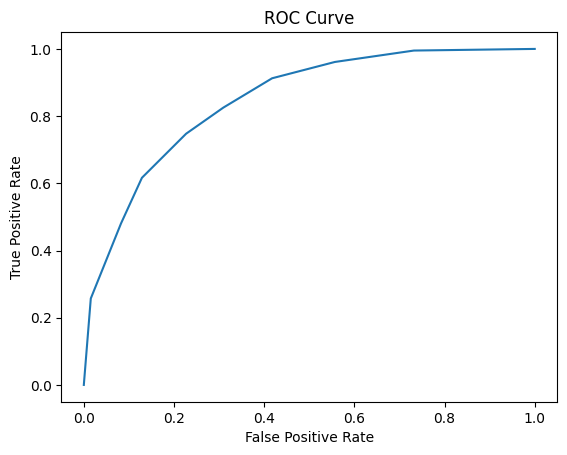

In [14]:
def predict(x, b1, b2):
    return 1 / (1 + np.exp(-b1*x[:,0] - b2*x[:,1]))

thresholds = np.linspace(0, 1, 10)
b1 = final_theta[0]
b2 =final_theta[1]
tpr = []
fpr = []
for i in thresholds:
    prob = predict(X, b1, b2)
    y_pred = np.where(prob >= i, 1, 0)
    tp = np.sum((y == 1) & (y_pred == 1))
    fp = np.sum((y == 0) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fn = np.sum((y == 1) & (y_pred == 0))
    tpr.append(tp / (tp + fn))
    fpr.append(fp / (fp + tn))

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Problem 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


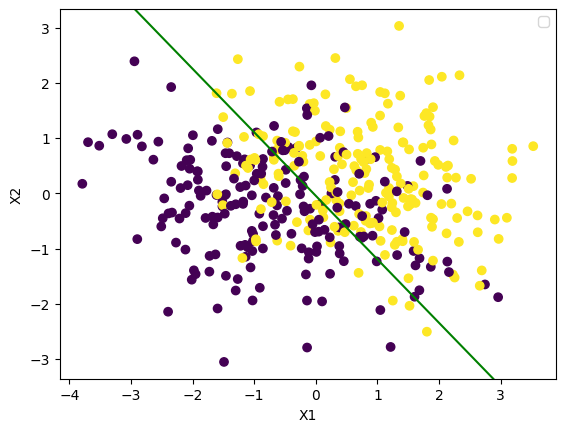

False Positive Error Rate: 25.3 %
False Negative Error Rate: 21.8 %


In [15]:
X1 = np.concatenate((x1_first,x1_second))
X2 = np.concatenate((x2_first,x2_second))
Y = y
def linear_disriminant_analysis(X1,X2,Y):
    mean1 = np.array([np.mean(X1[Y == 0]), np.mean(X2[Y == 0])])
    mean2 = np.array([np.mean(X1[Y == 1]), np.mean(X2[Y == 1])])
    cov = np.cov(np.column_stack((X1, X2)), rowvar=False)
    weights = np.dot(np.linalg.inv(cov), (mean2 - mean1))
    bias = -0.5 * np.dot(weights.T, (mean2 + mean1))
    return weights, bias
w, b = linear_disriminant_analysis(X1,X2, Y)
fig, ax = plt.subplots()
plt.scatter(X1, X2, c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
ax.axline((0, b), slope= - w[0] / w[1], color='green', label='decision boundary')
plt.show()

y_pred = (X.dot(w) + b > 0).astype(int)
tp = np.sum((Y == 1) & (y_pred == 1))
fp = np.sum((Y == 0) & (y_pred == 1))
tn = np.sum((Y == 0) & (y_pred == 0))
fn = np.sum((Y == 1) & (y_pred == 0))
fpr = fp/(fp+tn)
fnr = fn/(tp+fn)
print("False Positive Error Rate:", round(fpr*100,1), "%")
print("False Negative Error Rate:", round(fnr*100,1), "%")

In [16]:
model = LogisticRegression(random_state = 0, penalty = 'none')
X_train = pd.DataFrame(np.stack((X1,X2), axis = 1))
model.fit(X_train, Y)
y_pred = model.predict(X_train)
fpr = np.sum((y_pred == 1) & (Y == 0)) / np.sum(Y == 0)
fnr = np.sum((y_pred == 0) & (Y == 1)) / np.sum(Y == 1)
print('False positive rate is:' ,round(fpr * 100,1))
print('False negative rate is:' ,round(fnr * 100,1))

False positive rate is: 25.3
False negative rate is: 19.9


## The values for LDA and Logistic Regression are very close

## Problem 3

<Axes: >

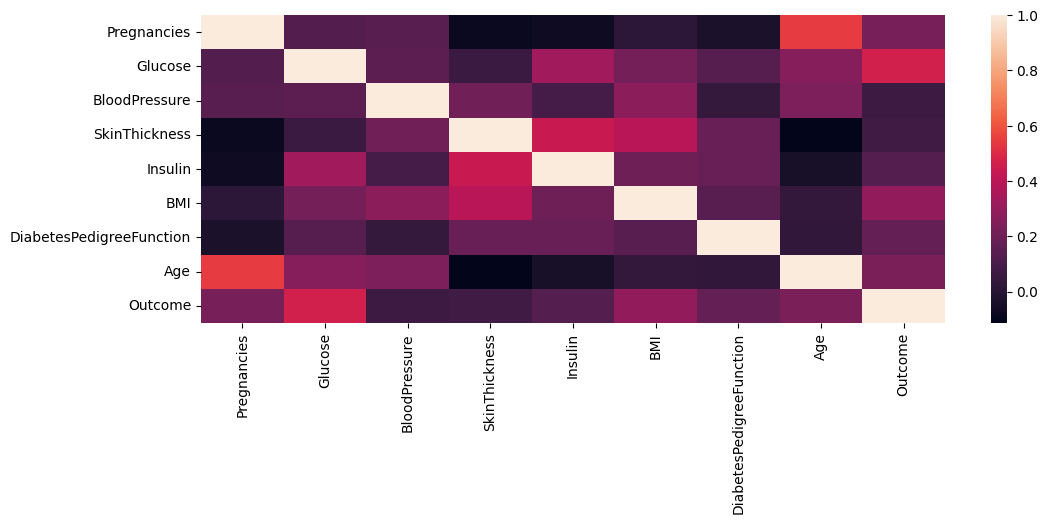

In [17]:
np.random.seed(1)
diabetes = pd.read_csv("diabetes.csv")
Y = diabetes['Outcome']
X = diabetes.drop(['Outcome'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=1)
plt.figure(figsize=(12, 4))
sns.heatmap(diabetes.corr())

## The independent variables are not highly correlated

In [18]:
def performance_metrics(Y_test, Y_pred):
    print('\nPerformance Metrics')
    print('Accuracy: ', accuracy_score(Y_test, Y_pred))
    print('Precision: ', precision_score(Y_test,Y_pred))
    print('Recall: ', recall_score(Y_test,Y_pred))
    print('F1: ', f1_score(Y_test,Y_pred))
    
    print(" ")
    print(classification_report(Y_test, Y_pred)) 
    confusion_matrix = metrics.confusion_matrix(Y_test,Y_pred)  
    cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix,
    display_labels=[0, 1])
  
    cm_display.plot()
    plt.show()

## Logistic Regression


Performance Metrics
Accuracy:  0.7792207792207793
Precision:  0.7560975609756098
Recall:  0.5636363636363636
F1:  0.6458333333333333
 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



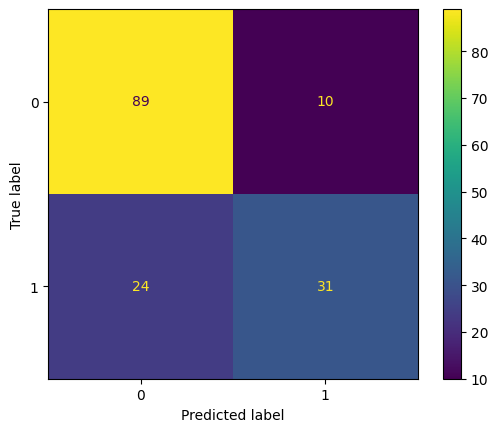

In [19]:
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
performance_metrics(Y_test, Y_pred)

## Implementing Feature Selection method called Backward Feature Elimination to compare results for each model before and after feature selection

In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector
bfe = SequentialFeatureSelector(model, k_features = 'best', forward=False, n_jobs=-1)
bfe.fit(X_train,Y_train)
features = list(bfe.k_feature_names_)
print(features)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']



Performance Metrics
Accuracy:  0.7857142857142857
Precision:  0.7619047619047619
Recall:  0.5818181818181818
F1:  0.6597938144329897
 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.58      0.66        55

    accuracy                           0.79       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.78      0.79      0.78       154



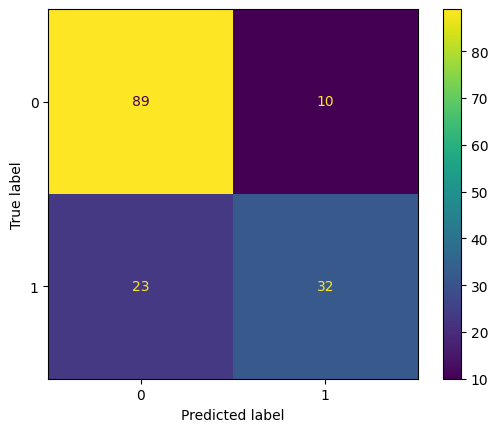

In [21]:
model.fit(X_train[features],Y_train)
Y_pred = model.predict(X_test[features])
performance_metrics(Y_test, Y_pred)

## We can see that the Accuracy increased from 77.9 to 78.5 for the Logistic Regression Model upon using the Backward Elimination Feature Selection Method

## LDA


Performance Metrics
Accuracy:  0.7792207792207793
Precision:  0.7560975609756098
Recall:  0.5636363636363636
F1:  0.6458333333333333
 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



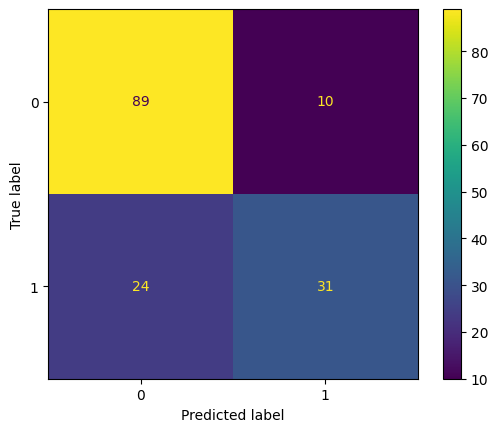

In [22]:
model = LinearDiscriminantAnalysis().fit(X_train,Y_train)
Y_pred = model.predict(X_test)
performance_metrics(Y_test, Y_pred)

## Feature Selection for LDA

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction', 'Age']

Performance Metrics
Accuracy:  0.7532467532467533
Precision:  0.7297297297297297
Recall:  0.4909090909090909
F1:  0.5869565217391305
 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        99
           1       0.73      0.49      0.59        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.71       154
weighted avg       0.75      0.75      0.74       154



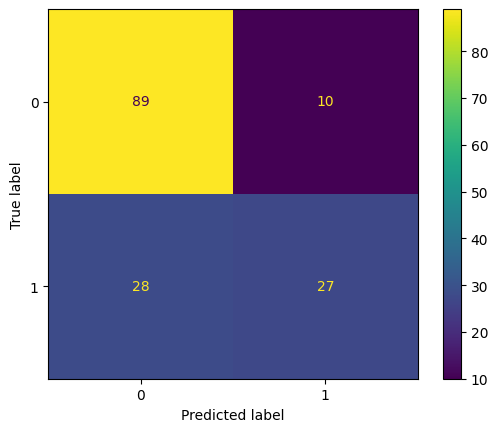

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector
bfe = SequentialFeatureSelector(model, k_features = 'best', forward=False, n_jobs=-1)
bfe.fit(X_train,Y_train)
features = list(bfe.k_feature_names_)
print(features)
model.fit(X_train[features],Y_train)
Y_pred = model.predict(X_test[features])
performance_metrics(Y_test, Y_pred)

## Naive Bayes


Performance Metrics
Accuracy:  0.7727272727272727
Precision:  0.7083333333333334
Recall:  0.6181818181818182
F1:  0.6601941747572815
 
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



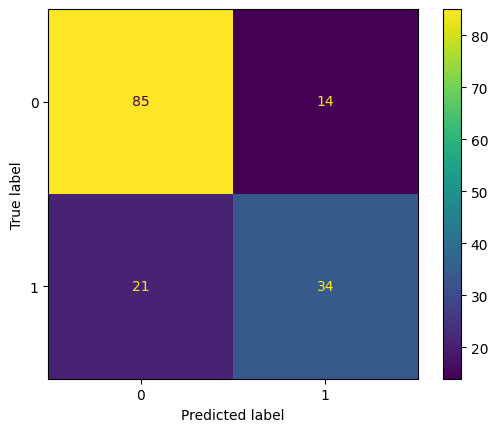

In [24]:
model = GaussianNB().fit(X_train, Y_train)
Y_pred = model.predict(X_test)
performance_metrics(Y_test, Y_pred)

## Feature Selection for Naive Bayes

['Glucose', 'BMI']

Performance Metrics
Accuracy:  0.7727272727272727
Precision:  0.7777777777777778
Recall:  0.509090909090909
F1:  0.6153846153846153
 
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        99
           1       0.78      0.51      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



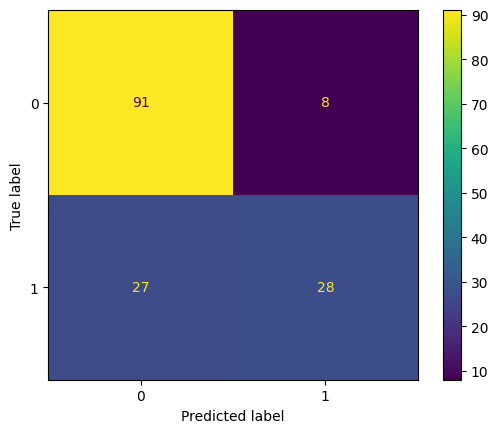

In [25]:
from mlxtend.feature_selection import SequentialFeatureSelector
bfe = SequentialFeatureSelector(model, k_features = 'best', forward=False, n_jobs=-1)
bfe.fit(X_train,Y_train)
features = list(bfe.k_feature_names_)
print(features)
model.fit(X_train[features],Y_train)
Y_pred = model.predict(X_test[features])
performance_metrics(Y_test, Y_pred)

## KNN


Performance Metrics
Accuracy:  0.7337662337662337
Precision:  0.6458333333333334
Recall:  0.5636363636363636
F1:  0.6019417475728155
 
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



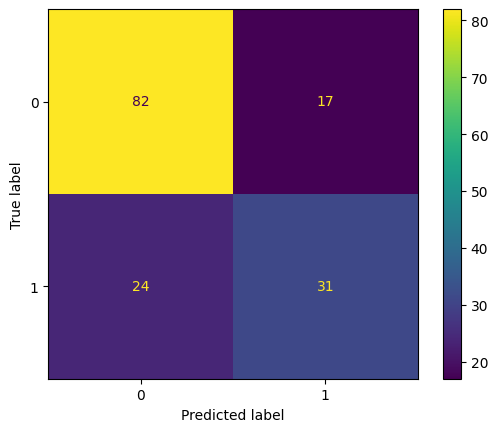

In [26]:
model = KNeighborsClassifier(n_neighbors=5).fit(X_train, Y_train)
Y_pred = model.predict(X_test)
performance_metrics(Y_test, Y_pred)

## Feature Selection for KNN

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']

Performance Metrics
Accuracy:  0.7597402597402597
Precision:  0.7142857142857143
Recall:  0.5454545454545454
F1:  0.6185567010309277
 
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        99
           1       0.71      0.55      0.62        55

    accuracy                           0.76       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



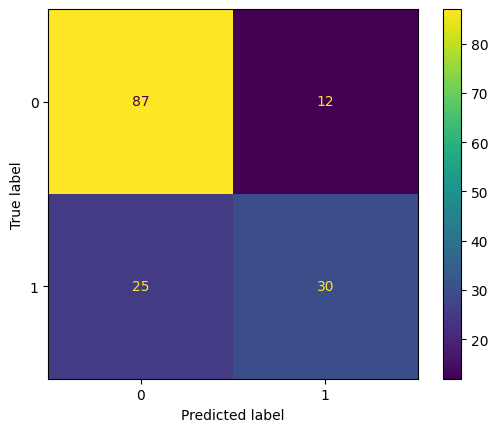

In [27]:
from mlxtend.feature_selection import SequentialFeatureSelector
bfe = SequentialFeatureSelector(model, k_features = 'best', forward=False, n_jobs=-1)
bfe.fit(X_train,Y_train)
features = list(bfe.k_feature_names_)
print(features)
model.fit(X_train[features],Y_train)
Y_pred = model.predict(X_test[features])
performance_metrics(Y_test, Y_pred)

## The Accuracies for all four models are very close lying in the range 73-78%. The Accuracies increased slightly in the case of Logistic Regression and KNN upon using the Feature Selection Method